Инокова Эвита 3824М1ФИ3


---


Выяснить, какие факторы имели наибольшее влияние на выживание в катастрофе.

https://www.kaggle.com/datasets/sakshisatre/titanic-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv("Titanic Dataset.csv")
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


**Pclass**: Ticket class indicating the socio-economic status of the passenger. It is categorized into three classes: 1 = Upper, 2 = Middle, 3 = Lower.

**Survived**: A binary indicator that shows whether the passenger survived (1) or not (0) during the Titanic disaster. This is the target variable for analysis.

**Name**: The full name of the passenger, including title (e.g., Mr., Mrs., etc.).

**Sex**: The gender of the passenger, denoted as either male or female.

**Age**: The age of the passenger in years.

**SibSp**: The number of siblings or spouses aboard the Titanic for the respective passenger.

**Parch**: The number of parents or children aboard the Titanic for the respective passenger.

**Ticket**: The ticket number assigned to the passenger.

**Fare**: The fare paid by the passenger for the ticket.

**Cabin**: The cabin number assigned to the passenger, if available.

**Embarked**: The port of embarkation for the passenger. It can take one of three values: C = Cherbourg, Q = Queenstown, S = Southampton.

**Boat**: If the passenger survived, this column contains the identifier of the lifeboat they were rescued in.

**Body**: If the passenger did not survive, this column contains the identification number of their recovered body, if applicable.

**Home.dest**: The destination or place of residence of the passenger.

In [4]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [5]:
data.describe(include='all')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


In [6]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055512,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055512,1.000000,-0.243699,-0.150917,0.178740,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178740,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [8]:
#Pclass, Survived, Sex, Age, SibSp, Parch
#Embarked?

In [9]:
data['sex'] = data['sex'].astype('category')
data['sex'].dtype

CategoricalDtype(categories=['female', 'male'], ordered=False, categories_dtype=object)

In [10]:
data['embarked'] = data['embarked'].astype('category')
data['embarked'].dtype

CategoricalDtype(categories=['C', 'Q', 'S'], ordered=False, categories_dtype=object)

In [11]:
data.describe(include=['category'])

,sex,embarked
count,1309,1307
unique,2,3
top,male,S
freq,843,914


In [12]:
data.isnull().sum()

,0
pclass,0
survived,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014


In [13]:
#data_cleaned = data[data['age'].notna()]
#data_cleaned = data_cleaned[data_cleaned['embarked'].notna()]
#data_cleaned.shape
data_cleaned = data

In [14]:
data_cleaned.isnull().sum()

,0
pclass,0
survived,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014


In [15]:
#survived from sex
#survived from age
#survived from pclass
#survived from sibsp
#survived from parch

In [16]:
data_scatter = data_cleaned.drop(['name', 'ticket', 'fare', 'cabin', 'boat', 'body', 'home.dest'], axis=1)

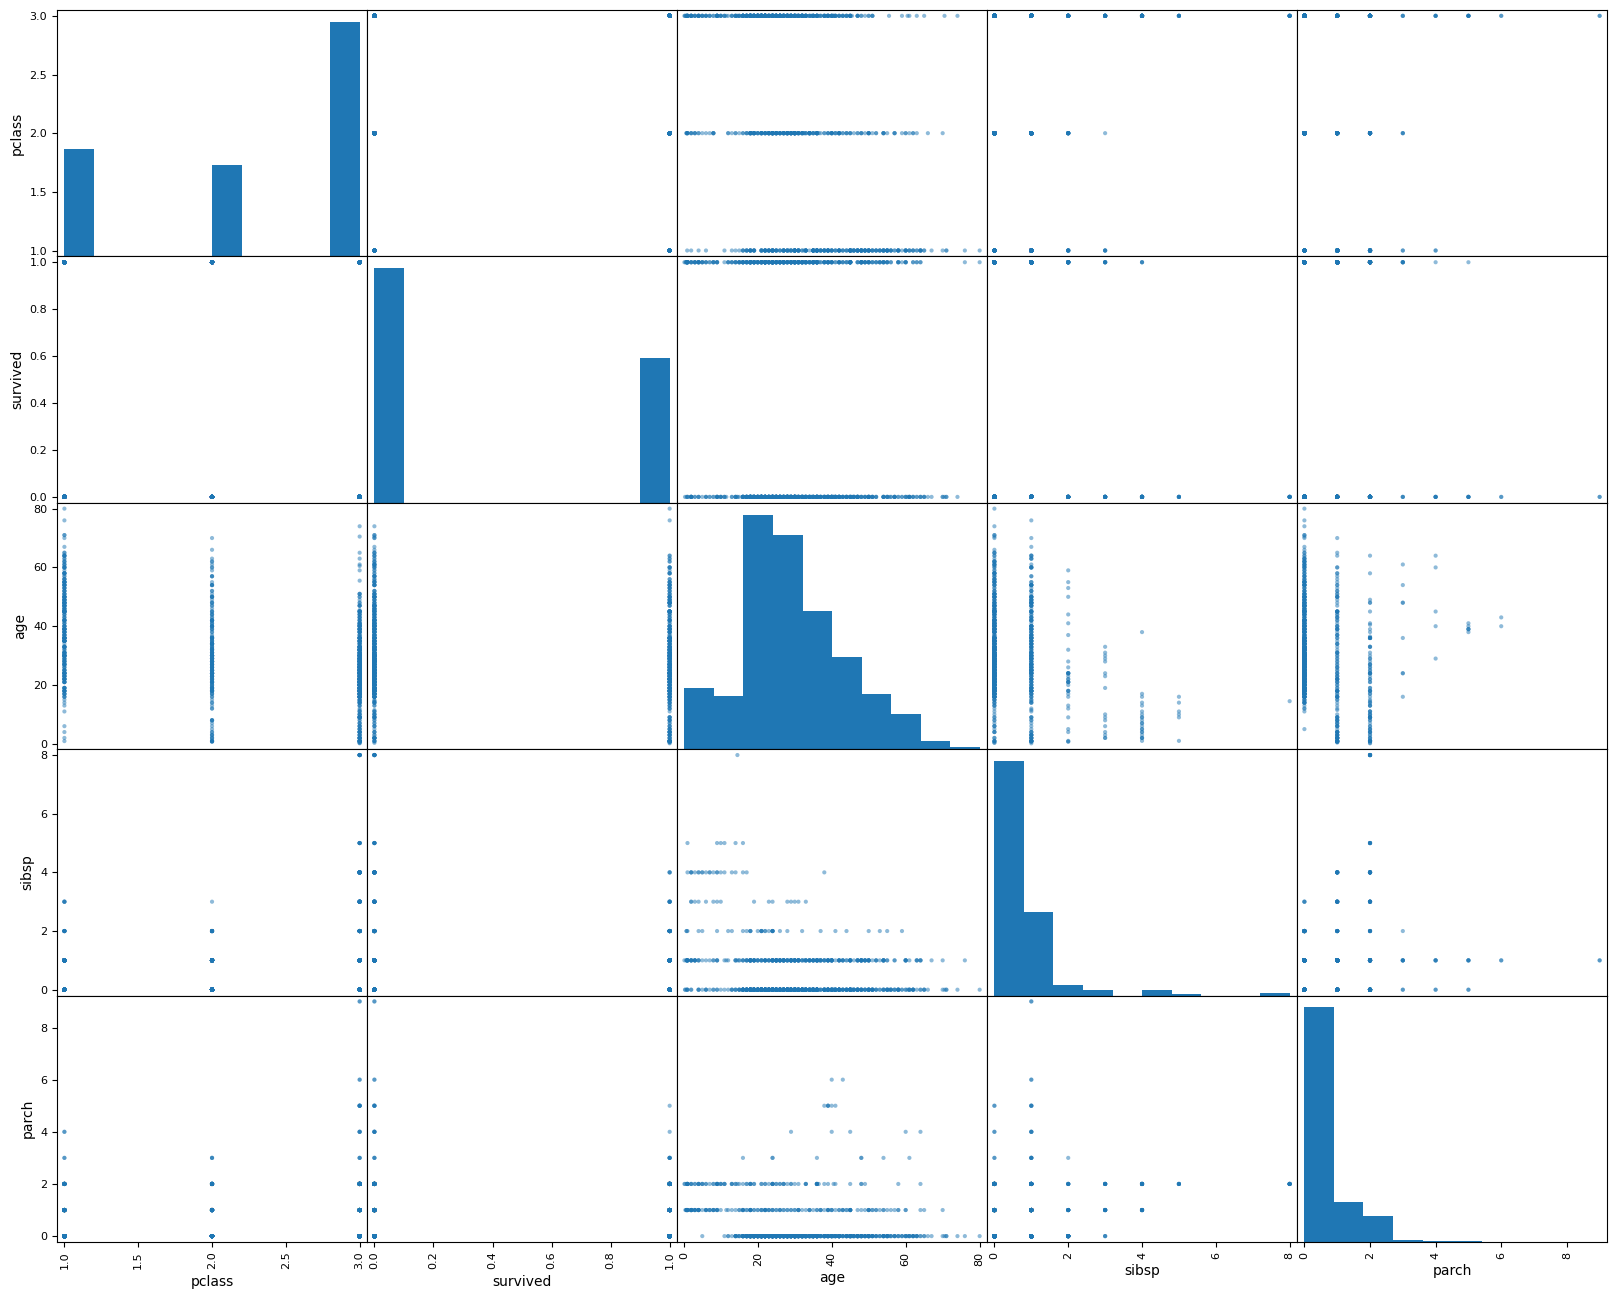

In [17]:
pd.plotting.scatter_matrix(data_scatter, figsize = (20, 16))
pass

In [18]:
data_cleaned['age'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,age
0.005,0.7500
0.010,0.9200
0.050,5.0000
0.100,14.0000
0.500,28.0000
0.900,50.0000
0.950,57.0000
0.990,65.0000
0.995,70.3875


**Значения в возрасте (age) меньше 1 должны быть приравнены к 0**

In [19]:
data_cleaned.loc[data_cleaned['age'] < 1.0, 'age'] = 0

In [20]:
data_cleaned['age'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,age
0.005,0.0000
0.010,0.0000
0.050,5.0000
0.100,14.0000
0.500,28.0000
0.900,50.0000
0.950,57.0000
0.990,65.0000
0.995,70.3875


In [21]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   category
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
dtypes: category(2), float64(3), int64(4), object(5)
memory usage: 125.7+ KB


In [22]:
data_cleaned['pclass'].value_counts()
#1 - Upper, 2 - Middle, 3 - Lower

,count
pclass,
3,709
1,323
2,277


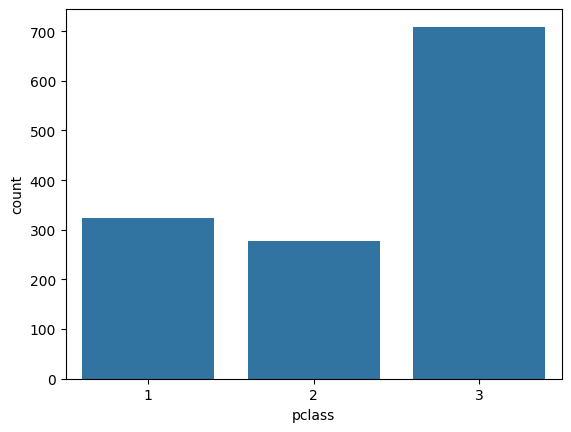

In [23]:
sns.countplot(x='pclass', data=data_cleaned)
pass

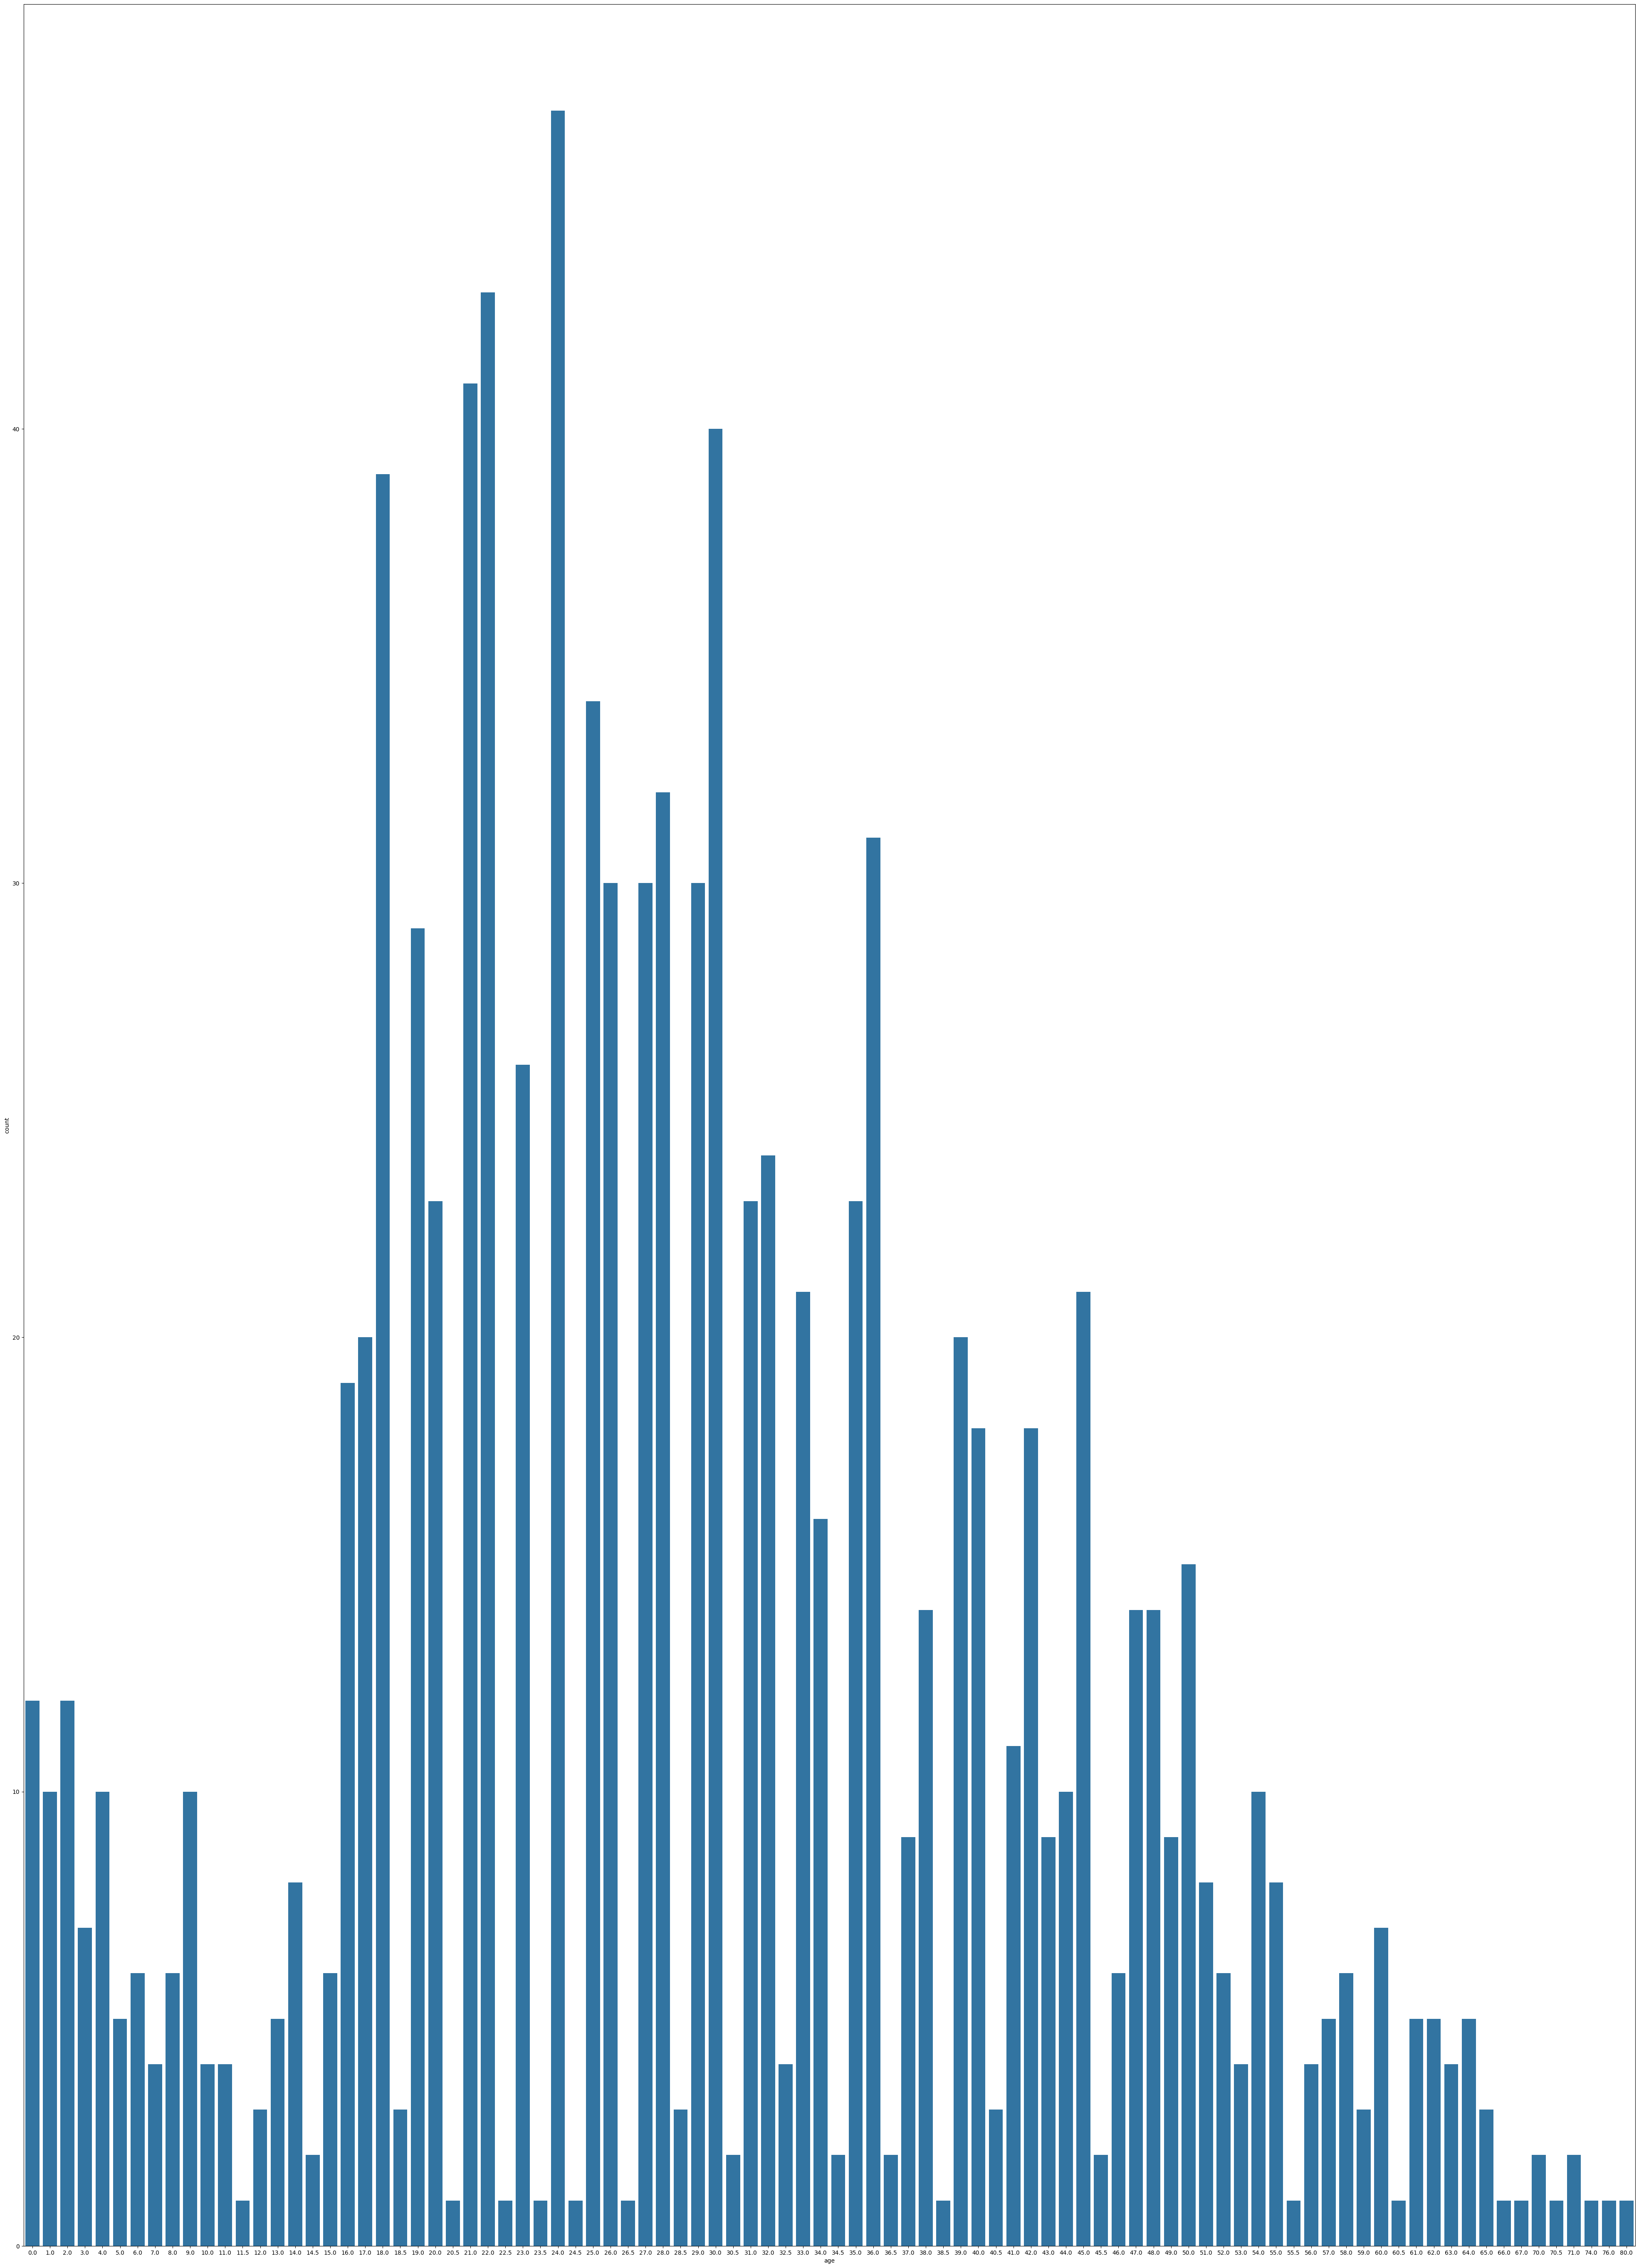

In [24]:
data_cleaned['age'].value_counts()
fig, ax = plt.subplots(figsize=(50, 70))
sns.countplot(x='age', data=data_cleaned, ax=ax)
pass

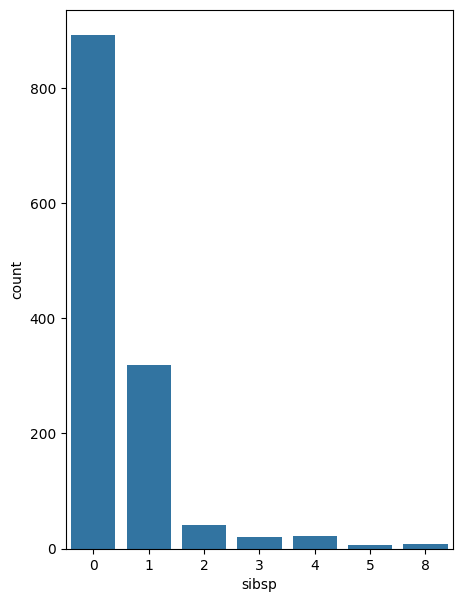

In [25]:
data_cleaned['sibsp'].value_counts()
fig, ax = plt.subplots(figsize=(5, 7))
sns.countplot(x='sibsp', data=data_cleaned, ax=ax)
pass

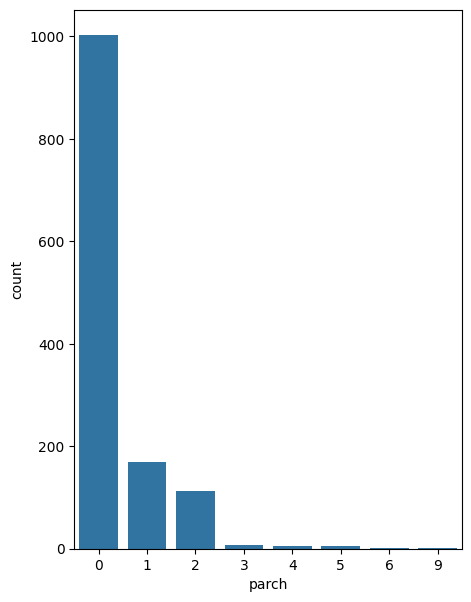

In [26]:
data_cleaned['parch'].value_counts()
fig, ax = plt.subplots(figsize=(5, 7))
sns.countplot(x='parch', data=data_cleaned, ax=ax)
pass

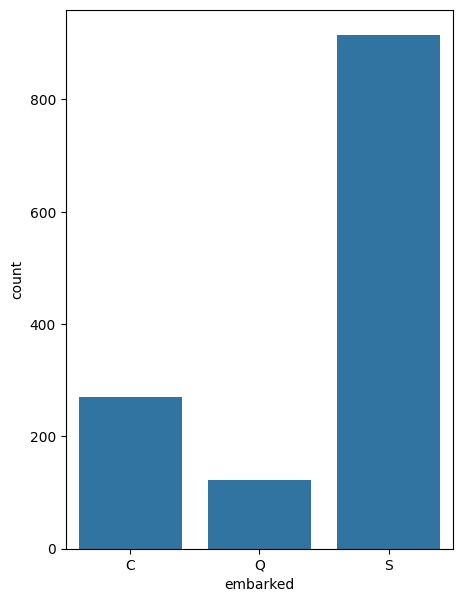

In [27]:
data_cleaned['embarked'].value_counts()
fig, ax = plt.subplots(figsize=(5, 7))
sns.countplot(x='embarked', data=data_cleaned, ax=ax)
pass

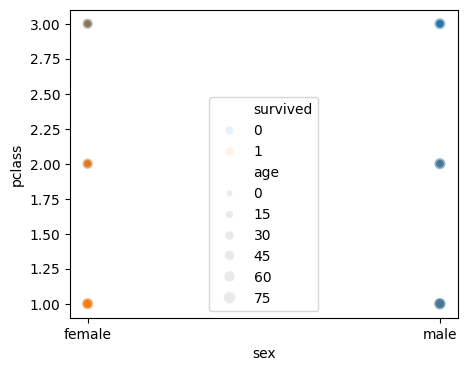

In [28]:
plt.figure(figsize = (5, 4))
sns.scatterplot(x='sex', y='pclass', size='age', hue='survived', data=data_cleaned, alpha=0.1)
pass

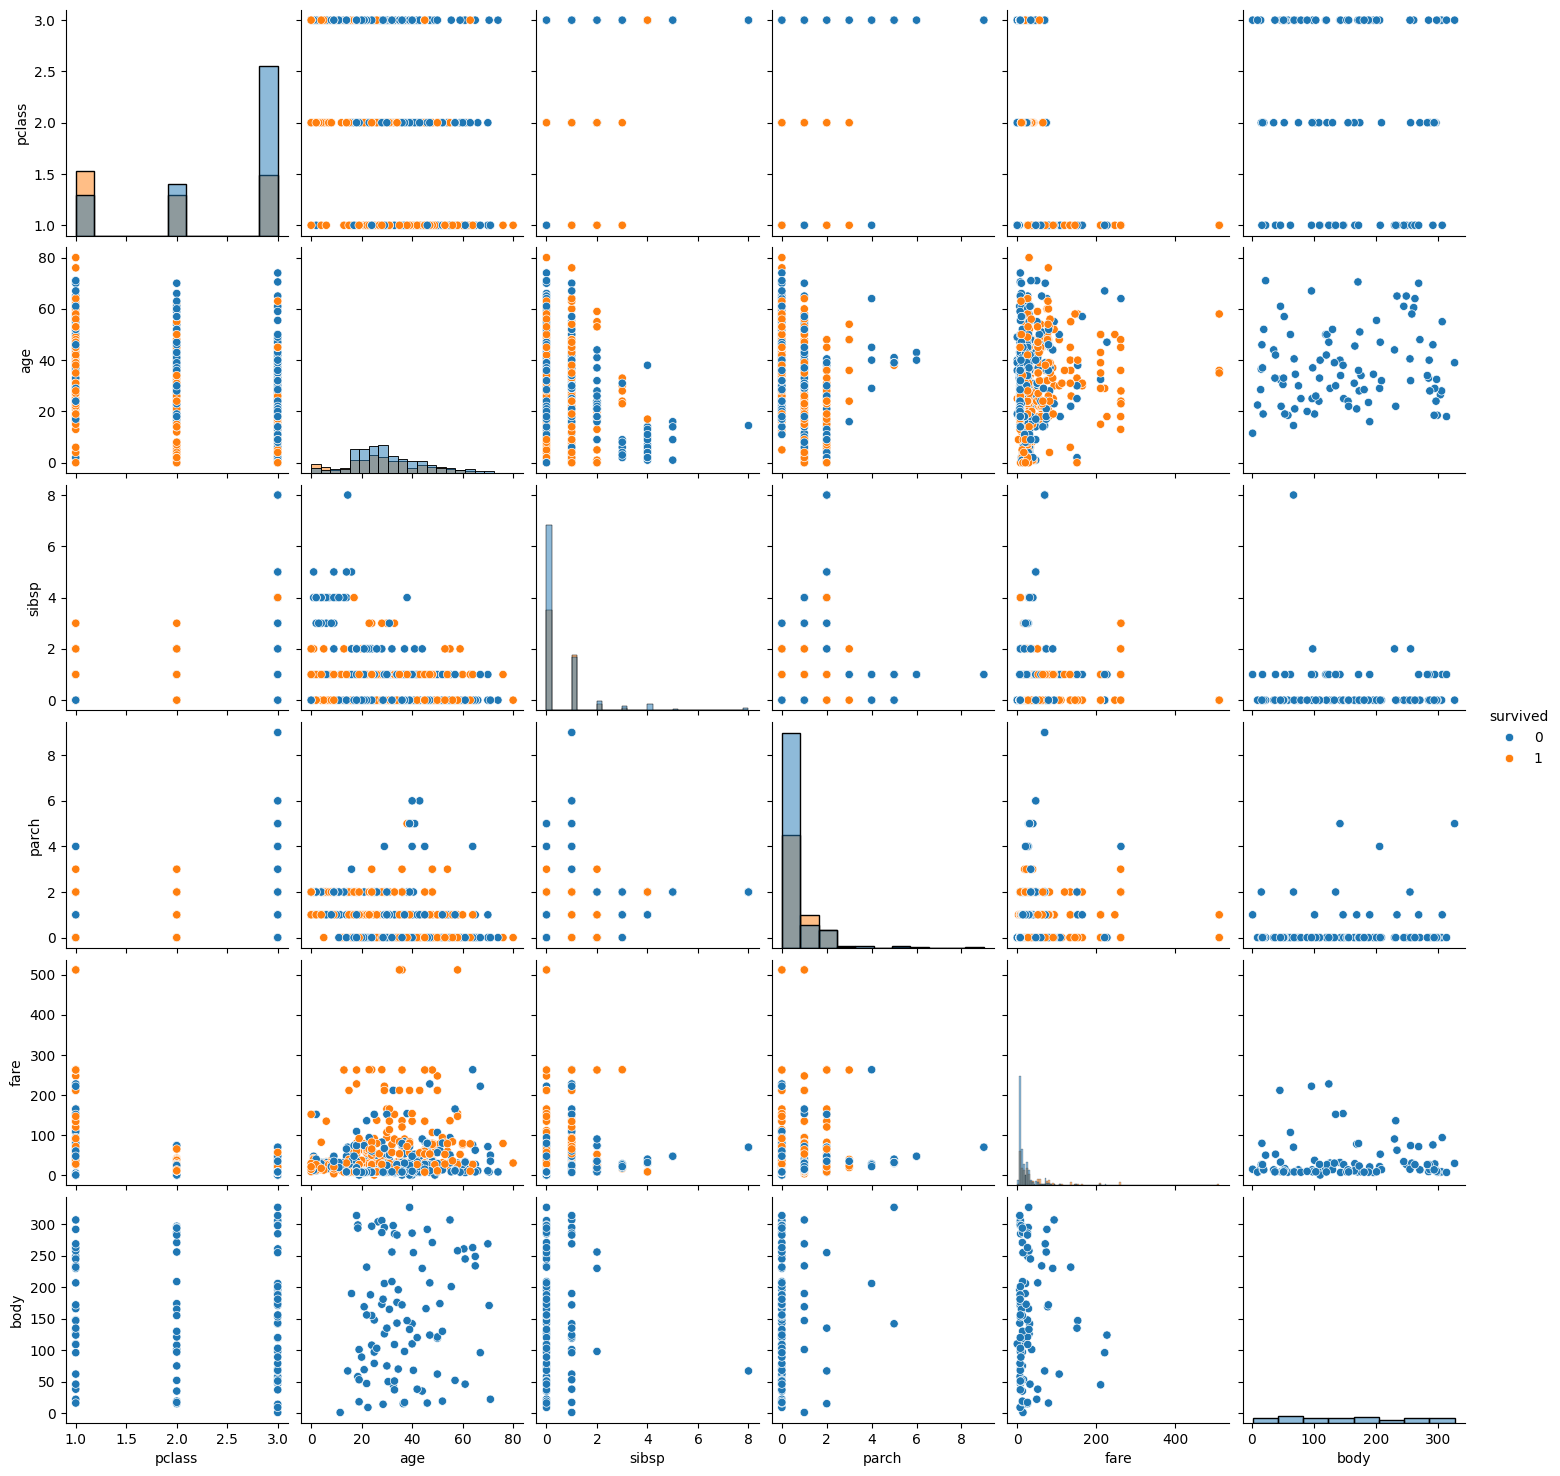

In [29]:
sns.pairplot(data_cleaned.sample(1000), hue='survived', diag_kind='hist')
pass

**Обучающая и тестовая выборки**

In [30]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   category
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
dtypes: category(2), float64(3), int64(4), object(5)
memory usage: 125.7+ KB


In [31]:
X = data_cleaned.drop(['name', 'survived', 'ticket', 'fare', 'cabin', 'boat', 'body', 'home.dest'], axis=1)
y = data_cleaned['survived']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(981, 328)

**Заполнение пропущенных значений**

In [33]:
X_train.isna().sum()

,0
pclass,0
sex,0
age,197
sibsp,0
parch,0
embarked,1


In [34]:
X_test.isna().sum()

,0
pclass,0
sex,0
age,66
sibsp,0
parch,0
embarked,1


In [37]:
from sklearn.impute import SimpleImputer
imp_num = SimpleImputer(missing_values=np.nan, strategy='median')
imp_num.fit(X_train[['age']])

SimpleImputer(strategy='median')

In [39]:
X_train[['age']] = imp_num.transform(X_train[['age']])

In [42]:
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_cat.fit(X_train[['embarked']])
X_train[['embarked']] = imp_cat.transform(X_train[['embarked']])

In [43]:
X_train.isna().sum()

,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
embarked,0


In [41]:
imp_num = SimpleImputer(missing_values=np.nan, strategy='median')
imp_num.fit(X_test[['age']])
X_test[['age']] = imp_num.transform(X_test[['age']])

,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
embarked,1


In [44]:
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_cat.fit(X_test[['embarked']])
X_test[['embarked']] = imp_cat.transform(X_test[['embarked']])

In [45]:
X_test.isna().sum()

,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
embarked,0


**Бинаризация категориальных признаков**

In [52]:
#embarked, sex
#sex: male = 1, female = 0
#embarked:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(X_train[['sex']])

OneHotEncoder(drop='if_binary', sparse_output=False)

In [53]:
X_train.head()

,pclass,sex,age,sibsp,parch,embarked
1139,3,male,38.0,0,0,S
678,3,male,6.0,1,1,C
290,1,male,52.0,1,1,S
285,1,male,67.0,1,0,S
1157,3,male,18.0,1,1,S


In [56]:
dummies = pd.DataFrame(enc.transform(X_train[['sex']]),
                       columns=enc.get_feature_names_out(), index=X_train.index)

In [57]:
dummies.tail()

,sex_male
1095,0.0
1130,0.0
1294,1.0
860,0.0
1126,0.0


In [58]:
X_train = pd.concat((X_train, dummies), axis=1).drop(['sex'], axis=1)

In [59]:
X_train.tail()

,pclass,age,sibsp,parch,embarked,sex_male
1095,3,28.0,0,0,Q,0.0
1130,3,18.0,0,0,S,0.0
1294,3,28.5,0,0,S,1.0
860,3,26.0,0,0,S,0.0
1126,3,28.0,0,0,S,0.0


In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 1139 to 1126
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    981 non-null    int64  
 1   age       981 non-null    float64
 2   sibsp     981 non-null    int64  
 3   parch     981 non-null    int64  
 4   embarked  981 non-null    object 
 5   sex_male  981 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 53.6+ KB


In [61]:
enc.fit(X_train[['embarked']])
dummies = pd.DataFrame(enc.transform(X_train[['embarked']]),
                       columns=enc.get_feature_names_out(), index=X_train.index)

In [62]:
dummies.head()

,embarked_C,embarked_Q,embarked_S
1139,0.0,0.0,1.0
678,1.0,0.0,0.0
290,0.0,0.0,1.0
285,0.0,0.0,1.0
1157,0.0,0.0,1.0


In [63]:
X_train = pd.concat((X_train, dummies), axis=1).drop(['embarked'], axis=1)
X_train.head()

,pclass,age,sibsp,parch,sex_male,embarked_C,embarked_Q,embarked_S
1139,3,38.0,0,0,1.0,0.0,0.0,1.0
678,3,6.0,1,1,1.0,1.0,0.0,0.0
290,1,52.0,1,1,1.0,0.0,0.0,1.0
285,1,67.0,1,0,1.0,0.0,0.0,1.0
1157,3,18.0,1,1,1.0,0.0,0.0,1.0


**Масштабирование количественных признаков**

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

In [65]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 1139 to 1126
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      981 non-null    float64
 1   age         981 non-null    float64
 2   sibsp       981 non-null    float64
 3   parch       981 non-null    float64
 4   sex_male    981 non-null    float64
 5   embarked_C  981 non-null    float64
 6   embarked_Q  981 non-null    float64
 7   embarked_S  981 non-null    float64
dtypes: float64(8)
memory usage: 69.0 KB


In [66]:
X_train.describe()

,pclass,age,sibsp,parch,sex_male,embarked_C,embarked_Q,embarked_S
count,9.810000e+02,9.810000e+02,9.810000e+02,9.810000e+02,9.810000e+02,9.810000e+02,9.810000e+02,9.810000e+02
mean,-4.345827e-17,3.621523e-18,9.053807e-18,-1.810761e-17,-9.415959e-17,5.432284e-17,-3.621523e-18,-6.066050e-17
std,1.000510e+00,1.000510e+00,1.000510e+00,1.000510e+00,1.000510e+00,1.000510e+00,1.000510e+00,1.000510e+00
min,-1.549072e+00,-2.294327e+00,-4.983125e-01,-4.330061e-01,-1.348690e+00,-5.012739e-01,-3.274500e-01,-1.536095e+00
25%,-3.562621e-01,-5.579839e-01,-4.983125e-01,-4.330061e-01,-1.348690e+00,-5.012739e-01,-3.274500e-01,-1.536095e+00
50%,8.365473e-01,-8.443574e-02,-4.983125e-01,-4.330061e-01,7.414601e-01,-5.012739e-01,-3.274500e-01,6.510012e-01
75%,8.365473e-01,4.285747e-01,4.399688e-01,-4.330061e-01,7.414601e-01,-5.012739e-01,-3.274500e-01,6.510012e-01
max,8.365473e-01,4.019648e+00,7.007939e+00,9.522751e+00,7.414601e-01,1.994917e+00,3.053902e+00,6.510012e-01


**Обучаем модель**

In [76]:
#Pclass, Survived, Sex, Age, SibSp, Parch
#Embarked?

knn = KNeighborsClassifier(n_neighbors=4, p=1)
knn.fit(X_train, y_train)
y_pred_knn_train = knn.predict(X_train)
print("Accuracy test:", accuracy_score(y_train, y_pred_knn_train))
print(classification_report(y_train, y_pred_knn_train))

Accuracy test: 0.854230377166157
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       625
           1       0.91      0.66      0.77       356

    accuracy                           0.85       981
   macro avg       0.87      0.81      0.83       981
weighted avg       0.86      0.85      0.85       981



In [80]:
RSS = ((y_pred_knn_train - y_train)**2).sum()
RSS/N_train, (RSS/N_train)**.5

(0.145769622833843, 0.3817978821756912)